In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import *
from pylab import *
import matplotlib.cm as cm

1. Plot both continuous and discrete signals of the function 
$$
X(t) = 325sin(2\pi50t)
$$


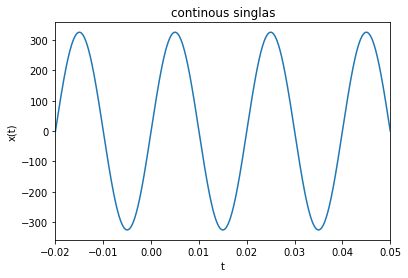

In [ ]:
# continuous signals
t = np.linspace(-0.02, 0.05, 10000)
equation = 325 * np.sin(2*np.pi*50*t)
plt.figure()
plt.plot(t, equation)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.xlim([-0.02, 0.05])
plt.title("continous singlas")
plt.show()


And also the discrete signals. Where n is sampled from 0 to 50. 
$$
x[n] = 325sin(2\pi50n\triangle t)
$$




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 1.0, 'discrete signals')

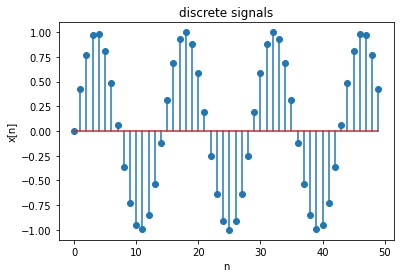

In [ ]:
# discrete signals 
n = np.arange(50) # sampled from 0 to 50: x[50]
dt = (0.05-(-0.02))/50
x = np.sin(2*np.pi*50*n*dt)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, x, bottom = 0)
plt.title("discrete signals")

2.(5pts) Consider a complex-valued signal,
$$
x(t) = e^{j100\pi t}
$$
 Can you plot the real and imaginary part Of the function when t have a range of (-0.02, 0.05)? 

Hint:
- np.exp(2j* np.pi * 50 * t).real. would return real parts
- np.exp(2j* np.pi * 50 * t).imag.  would return imaginary parts


(-0.02, 0.05)

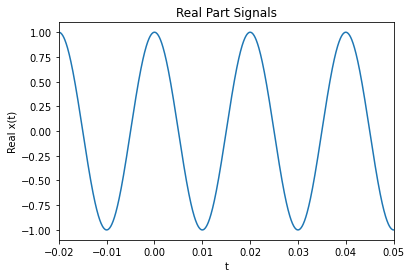

In [ ]:
# real part
# np.exp(2j*np.pi*50*t).real. would return real parts
t = np.linspace(-0.02, 0.05, 1000)
plt.plot(t, np.exp(2j*np.pi*50*t).real)
plt.xlabel("t")
plt.ylabel('Real x(t)')
plt.title("Real Part Signals")
plt.xlim([-0.02, 0.05])

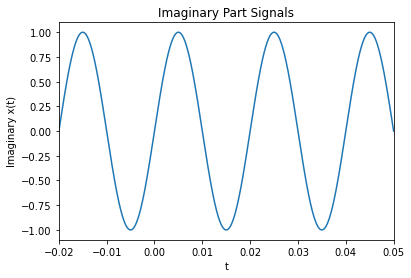

In [ ]:
# imaginary part
# np.exp(2j*np.pi*50*t).imag. would return imaginary parts
plt.plot(t, np.exp(2j*np.pi*50*t).imag)
plt.xlabel('t')
plt.ylabel('Imaginary x(t)')
plt.title("Imaginary Part Signals")
plt.xlim([-0.02, 0.05]);
plt.show()

3.(5pts) In this exercise, we want to generate the same plot as Slide No. 20 in the lecture9 slides (Figure 1.20 in Chapter SignalProcessing.pdf).  Figure see below. 
 
Take a 1D discrete signal, eg. f[n], show that the foureier transform 
Of a translated signal f[n-x] and its left-right mirror signal would have resulted in the same magnitude.  Basically, use numpy.fft and matplotlib, generate the following graphs. You can use a different f[n], use **N= 32** as the Fourier coefficients. 

Hint: you can use similar code to create discrete signals in numpy:
 
>>> t = np.linspace(0,20,N)\
>>> x = np.exp(-t/3)*np.cos(2 * t)

The red and green dots ae real and imaginary parts of the FFT of the signal. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


AttributeError: ignored

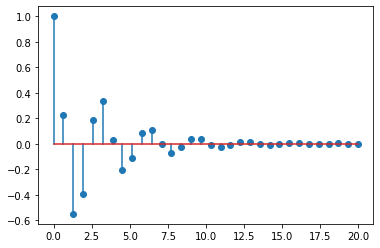

In [5]:
n = 32
t = np.linspace(0, 20, n)
x = np.exp(-t/3)*np.cos(2*t)
plt.stem(t, x) # stem plots vertical lines from a baseline to the y-coordinate and places a marker at the tip.
plt.show()

4. (5pts) Plot the Fourier transform of the following function for frequency below 50hz, using the numpy.fft
$$
1/(1+0.99\cos(2\pi t))
$$

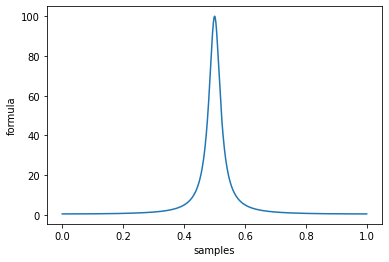

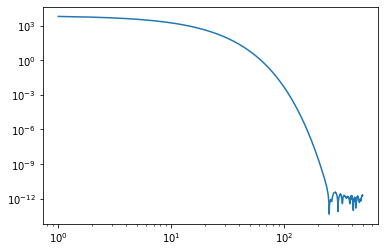

In [3]:
def formula(t):
    return 1/ (1+.99 * cos(2*pi*t))

Taux = 50 # sample rate should be at least 100
T = np.linspace(0, 1, 1000) # duration
N = Taux * T # number of points

X = np.linspace(0, T, N, endpoint = False)
Y = formula(X)

figure('exo 1A')
clf()
xlabel("samples"); ylabel("formula")
plot(X, Y)

Ytilde = fft(Y)

Freq = arange(N)
# The frequency is defined modulo N.
# We take values between -N/2 and N/2
Freq[Freq>=N/2] = Freq[Freq>=N/2] - N
Freq = Freq/T

figure('exo 1B')
clf()
loglog(Freq[1:N//2-1], abs(Ytilde)[1:N//2-1])


In [1]:
# define the equation first
def equation(t):
  return 1/(1+0.99*np.cos(2*pi*t))

sampleRate = 100 # the sample rate should at least be 100
duration = 1 # duration
numberOfPoints = sampleRate * duration 

x = linspace(0, duration, numberOfPoints, endpoint = False) # betewwn 0 to 1 with 100 samples
y = equation(x)

Ytilde = fft(y)
freq = arange(numberOfPoints)
# The frequency is defined modulo N.
# We take values between -N/2 and N/2
freq[freq >= numberOfPoints/2] = freq [freq >= numberOfPoints/2] - numberOfPoints
freq = freq / duration

plt.loglog(freq[1:numberOfPoints//2-1], abs(Ytilde)[1:numberOfPoints//2-1])
plt.title("FFT of 1/(1+0.99*np.cos(2*pi*t))")
plt.show()

NameError: ignored

5.(5pts) Create the following 2D sine wave grating patterns as images and show their 2D Fourier transforms of the three images. You must plot both thee input images in real domain and the Fourier domain. 

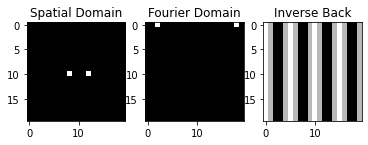

In [ ]:
def fourierPlot(u, v):
  M = N = 20 # M = col, N = row
  xy = np.zeros((M, N))

  xy[M//2-v, N//2+u] = 1
  xy[M//2+v, N//2-u] = 1

  plt.subplot(1,3,1)
  plt.imshow(xy, cmap = "gray")
  plt.title("Spatial Domain")
  plt.subplot(1,3,2)
  plt.imshow(np.fft.fftshift(xy), cmap = "gray")
  plt.title("Fourier Domain")
  plt.subplot(1,3,3)
  plt.imshow(np.abs(np.fft.ifft2(np.fft.ifftshift(xy))), cmap = "gray")
  plt.title("Inverse Back")

fourierPlot(2, 0)

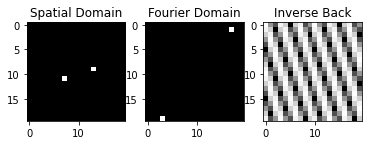

In [ ]:
fourierPlot(3, 1)

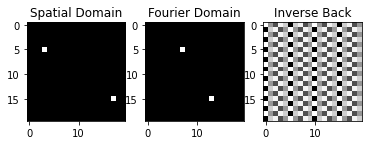

In [ ]:
fourierPlot(7, -5)

# Pyramid Blending
6.(25pts) Pyramid Blending: Write a program that takes an input two color images and a binary mask images and produces the Laplacian pyramid blend of the two images.

- Construct the Laplacian pyramid for each image. 
- Construct the Gaussian pyramid for the two mask images (the input image and its complement)
- Multiply each Laplacian image by its corresponding mask and sum the images 
- Reconstruct the final image from the Blended Laplacian pyramid. 


Here are some more detailed instructions: 
Laplacian Pyramids.  Implement functions that build and collapse Laplacian pyramids. The input to the Laplacian pyramid building function is an image and the output is both the Gaussian and Laplacian pyramids for the image. The situation is reversed for collapsing a Laplacian pyramid (but really all that is needed is the lowest level Gaussian along with all levels of the Laplacian pyramid). You can use the interpolate and decimate functions discussed in class, or you can implement your own. Note that building and collapsing a Laplacian pyramid should yield the original input image. Before you do any blending, checking whether your code can successfully collapsing into multiple sub-bands and reconstruct an image.

Create an image that shows multiple levels of the Gaussian and Laplacian pyramid of an image and include this in your write up along with an explanation of image pyramids in your own words.

Laplacian Blending. Implement Laplacian image blending for a pair of images and a binary mask. In Laplacian blending, a new Laplacian pyramid is built by alpha blending each corresponding Laplacian pyramid level for the input image pairs using a Gaussian pyramid of the binary mask as the alpha mask. The lowest level of the new pyramid also includes the alpha blend of the lowest level Gaussian images in the two pyramids (you can blend all levels of the Gaussian pyramids if you want, but you technically only need the coarsest level). The resulting Laplacian pyramid is collapsed to recover the blended image.

Try your multi-scale Laplacian blending method out on several sets of images. Show at least three results you consider "good" and one you consider "poor" in your write up. For each image, discuss why you think this approach did or did not work well. 

*You can compare your results with a simple “copy and paste” methods by directly apply mask on one image and blend with another*

Tips
To blend a pair of images you need a source image, target image, and mask. The source image contains the data you are inserting into the target image. The mask indicates where in the output image the data comes from the source image. It helps if all three images are the same size. A simple mask can be built by dividing the image plane in half. This will blend two images together along the middle seam, which is what is done for the famous apple/orange hybrid.

More advanced masks can be created using an image editing program that uses layers, such as Gimp. A simple procedure is:
- Open the target image
- Open the source image
- Select a region in the source image (rectangle, oval, lasso). Copy it.
- Paste the region into the target image as a new layer.
- Move or rescale the new layer so it appears where you want it to above the target layer.
- Create a new transparent layer.
- Paint in this layer with white paint where you want the source image data to appear in the final image.
- For each layer in turn, make the layer exclusively visible, select Save As... and save the file with a unique name, like myblend-source.png.
 
Note that Gimp on the Mac is a little annoying because you have to click in a window to change focus before you can interact with the window.
Valid mask values used for alpha blending are between zero and one.

If you load an alpha mask from a file, you will probably need to modify the image data to fit within this range. You may also want to make sure you are using the same mask for all color channels.

In [ ]:
"""
from google.colab import files
uploadImg = files.upload()
"""

# install the libraries
import numpy as np
import scipy.signal as sig
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
import imageio
from google.colab.patches import cv2_imshow

# create a  Binomial (5-tap) filter
kernel = (1.0/256)*np.array([[1, 4, 6, 4, 1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4, 6, 4, 1]])
"""
plt.imshow(kernel)
plt.show()
"""

def interpolate(image):
  """
  Interpolates an image with upsampling rate r=2.
  """
  image_up = np.zeros((2*image.shape[0], 2*image.shape[1]))
  # Upsample
  image_up[::2, ::2] = image
  # Blur (we need to scale this up since the kernel has unit area)
  # (The length and width are both doubled, so the area is quadrupled)
  #return sig.convolve2d(image_up, 4*kernel, 'same')
  return ndimage.filters.convolve(image_up,4*kernel, mode='constant')
                                
def decimate(image):
  """
  Decimates an image with downsampling rate r=2.
  """
  # Blur
  #image_blur = sig.convolve2d(image, kernel, 'same')
  # print(np.shape(image), np.shape(kernel))
  image_blur = ndimage.filters.convolve(image,kernel, mode='constant')
  # Downsample
  return image_blur[::2, ::2]                                
               
                                      
  # here is the constructions of pyramids
def pyramids(image):
  """
  Constructs Gaussian and Laplacian pyramids.
  Parameters :
  image  : the original image (i.e. base of the pyramid)
  Returns :
  G   : the Gaussian pyramid
  L   : the Laplacian pyramid
  """
  # Initialize pyramids
  G = [image, ]
  L = []

  # Build the Gaussian pyramid to maximum depth
  while image.shape[0] >= 2 and image.shape[1] >= 2:
    image = decimate(image)
    G.append(image)

  # Build the Laplacian pyramid
  for i in range(len(G) - 1):
    L.append(G[i] - interpolate(G[i + 1]))

  return G[:-1], L

# [G, L] = pyramids(image)

# Build Gaussian pyramid and Laplacian pyramids from images A and B, also mask
# Reference: https://becominghuman.ai/image-blending-using-laplacian-pyramids-2f8e9982077f
def pyramidBlending(A, B, mask):
  [GA, LA] = pyramids(A)
  [GB ,LB] = pyramids(B)
  # Build a Gaussian pyramid GR from selected region R (mask that says which pixels come from left and which from right)
  [Gmask, LMask] = pyramids(mask)
  # Form a combined pyramid LS from LA and LB using nodes of GR as weights
  # Equation: LS(i, j) = GR(I, j)*LA(I, j) + (1-GR(I, j)* LB(I, j))
  # Collapse the LS pyramid to get the final blended image
  blend = []
  for i in range(len(LA)):
    # LS = np.max(Gmask[i])*LA[i] + (1-np.max(Gmask[i]))*LB[i]
    LS = Gmask[i]/255*LA[i] + (1-Gmask[i]/255)*LB[i]
    blend.append(LS)
  return blend

# reconstruct the pyramids as well as upsampling and add up with each level
def reconstruct(pyramid):
  rows, cols = pyramid[0].shape
  res = np.zeros((rows, cols + cols//2), dtype= np.double)
  # start the smallest pyramid so we need to reverse the order
  revPyramid = pyramid[::-1]
  stack = revPyramid[0]
  # start with the second index
  for i in range(1, len(revPyramid)):
    stack = interpolate(stack) + revPyramid[i] # upsampling simultaneously
  return stack

# https://compvisionlab.wordpress.com/2013/05/13/image-blending-using-pyramid/
# Besides pyramid Blending, we need to blend image's color
def colorBlending(img1, img2, mask):
  # split to 3 basic color, then using pyramidBlending and reconstruct it, respectively
  img1R,img1G,img1B = cv2.split(img1)
  img2R,img2G,img2B = cv2.split(img2)
  R = reconstruct(pyramidBlending(img1R, img2R, mask))
  G = reconstruct(pyramidBlending(img1G, img2G, mask))
  B = reconstruct(pyramidBlending(img1B, img2B, mask))
  output = cv2.merge((R, G, B))
  imageio.imsave("output.png", output)
  img = cv2.imread("output.png")
  cv2_imshow(img)


apple = imageio.imread('apple.jpg')
orange = imageio.imread('orange.jpg')
mask = cv2.imread('mask.jpg', 0)
colorBlending(apple, orange, mask)


# Bells & Whistles (Extra Points)
1. (5pts) Be exceptional creative of acquiring and your choices of source and target images.  
- Please refer to my good and poor cases in the `index.html` file.
2. (5pts) You can discuss the shortcomings you discovered with the Pyramid method. When does the method fail?
- Based on my poor case of HW3 project, if the color of the two images is extremely different, it won't blend smoothly even though we have used Laplacian blending. Futhermore, [Carnegie Mellon University's](http://graphics.cs.cmu.edu/courses/15-463/2005_fall/www/Lectures/Pyramids.pdf) lecture indicates there are three limitations in the pyramid method: 

 a. Reversing the contrast (grey on black -> gray on white) is not possible.\
 b. Backgrounds with different colors “bleed through”.\
 c. The images must be perfectly aligned.

3. (5pts) Implement the two-band Laplacian blending described in Brown and Lowe, Recognizing Panaroams, ICCV  2003. You can simply jumpt to section 5, last  two paragraphs. Compare with the multi-band method you have already have implemented.  
- 
4. (5pts) Implement Poisson image blending (Perez03). See attached paper. 
- 